In [53]:
#Entrenamiento Alturas

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo Tensor
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2


In [54]:
# Cargamos el Dataset
file_path = "dataset/dataset.csv"
df = pd.read_csv(file_path)

In [55]:
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 
    'slant_range', 'final_latitude', 'final_longitude', 'final_elevation'
]
X = df[X_columns]
Y = df.drop(columns=X_columns)

X = X.drop(columns=['final_latitude','final_longitude','final_elevation'])

lat_columns = [f'lat_{i}' for i in range(1,101)]
long_columns = [f'long_{i}' for i in range(1,101)]
heights_columns = [f'elev_{i}' for i in range(1,101)]
Y = Y.drop(columns = lat_columns)
Y = Y.drop(columns = long_columns)

unwanted_columns = ["delay","terrestrial_range","slant_range"]
X = X.drop(columns=unwanted_columns)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)



In [56]:
k_norm = 1E6
k_altura =1E3
x_train["fc"] = x_train["fc"]/k_norm
x_test["fc"] = x_test["fc"]/k_norm
y_test = y_test/k_altura
y_train = y_train/k_altura
y_test.head()

#Normalizamos las Alturas 
#Buscamos el máximo de y_train
# max_height = y_train[heights_columns].max().max()
# print("Máxima altura en el conjunto de entrenamiento:",max_height)
# y_train[heights_columns]= y_train[heights_columns]/max_height
# y_test[heights_columns] = y_test[heights_columns]/max_height
# print("Máxima altura en y_test:",y_test[heights_columns].max().max())


,elev_1,elev_2,elev_3,elev_4,elev_5,elev_6,elev_7,elev_8,elev_9,elev_10,...,elev_91,elev_92,elev_93,elev_94,elev_95,elev_96,elev_97,elev_98,elev_99,elev_100
5104,0.0,3.082233,6.164467,9.246700,12.328934,15.411167,18.511526,21.616719,24.721911,27.827104,...,274.761941,277.656285,280.550628,283.444972,286.343814,289.259524,292.175234,295.090944,298.006653,300.922363
2186,0.0,0.190163,0.348855,0.350186,0.414906,0.606401,1.293013,2.474743,3.969682,5.621227,...,0.453347,0.454679,0.391468,0.199174,0.079723,0.033114,0.014382,0.009588,0.004794,0.000000
4371,0.0,3.437401,6.874803,10.312204,13.749605,17.188166,20.648748,24.109331,27.569913,31.030495,...,287.911932,290.723149,293.534367,296.345585,299.156802,299.317417,299.338527,299.359636,299.380746,299.401855
831,0.0,0.186642,0.348805,0.350112,0.400721,0.588670,1.161710,2.321555,3.725009,5.345969,...,0.526900,0.338690,0.239874,0.241181,0.180462,0.079037,0.042051,0.028197,0.014116,0.000000
1421,0.0,0.313417,0.350581,0.595762,1.993297,4.367276,7.151974,10.063551,13.101760,16.266557,...,10.683993,7.254064,3.950378,1.552705,0.688733,0.515147,0.180087,0.002244,0.001317,0.000000


In [57]:
from tensorflow.keras import backend as K

def custom_mse(y_true,y_pred):
  return K.square(((y_pred-y_true)**2)/100)

In [58]:
l2_reg = 0.0009
inputs = Input(shape =(10,))
encoded = Dense(8, activation = "relu",kernel_regularizer=l2(l2_reg))(inputs)
encoded = Dense(16, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(32, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(80, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(90, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(100, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(120, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(110, activation = "relu",kernel_regularizer=l2(l2_reg))(encoded)
decoded = Dense(100, activation = "linear",kernel_regularizer=l2(l2_reg))(encoded)
#Cambio la funcion de activacion de la ultima capa de linear a sigmoid
autoencoder = Model(inputs,decoded)
autoencoder.compile(optimizer = "adamW", loss="mse")
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,478 (95.62 KB)

 Trainable params: 24,478 (95.62 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
# Entrenamiento (150 80)(150 90)(150 100)(160 100)(170 110)
history = autoencoder.fit(x_train,y_train, epochs=180, batch_size = 150
                          )
#validation_data = (x_test,y_test)

Epoch 1/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 12712.8301
Epoch 2/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4799.8804
Epoch 3/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4536.1196
Epoch 4/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4370.0269
Epoch 5/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4315.9512
Epoch 6/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4392.6865
Epoch 7/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4335.7324
Epoch 8/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4224.5464
Epoch 9/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3870.8806  
Epoch 10/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3542.5693
Epoch 11/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2892.3521
Epoch 12/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2702.8926
Epoch 13/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2506.2620
Epoch 14/180
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2430.9729
Epoch 15/180
28/28 ━━━━━━━

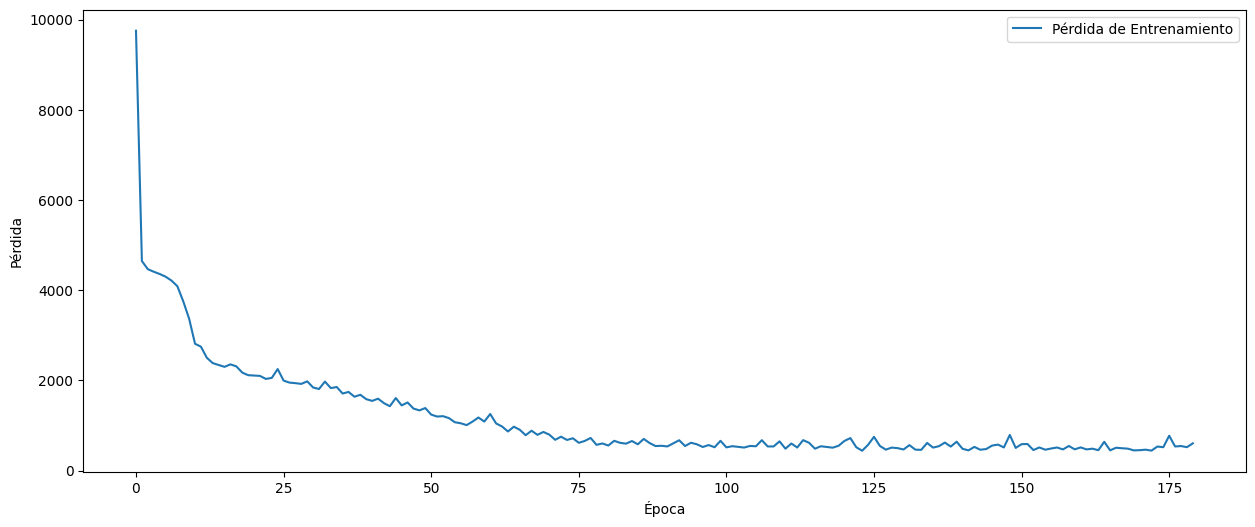

In [ ]:
# Función de Pérdida durante el entrenamiento
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'], label = 'Pérdida de Entrenamiento')
#plt.plot(history.history['val_loss'], label = 'Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
# plt.ylim(-2,100)
plt.legend()
plt.show()

In [71]:
# Predecimos una muestra en particular de mi df_test
idx = 10

y_pred = autoencoder.predict(np.expand_dims(x_test.iloc[idx], axis = 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


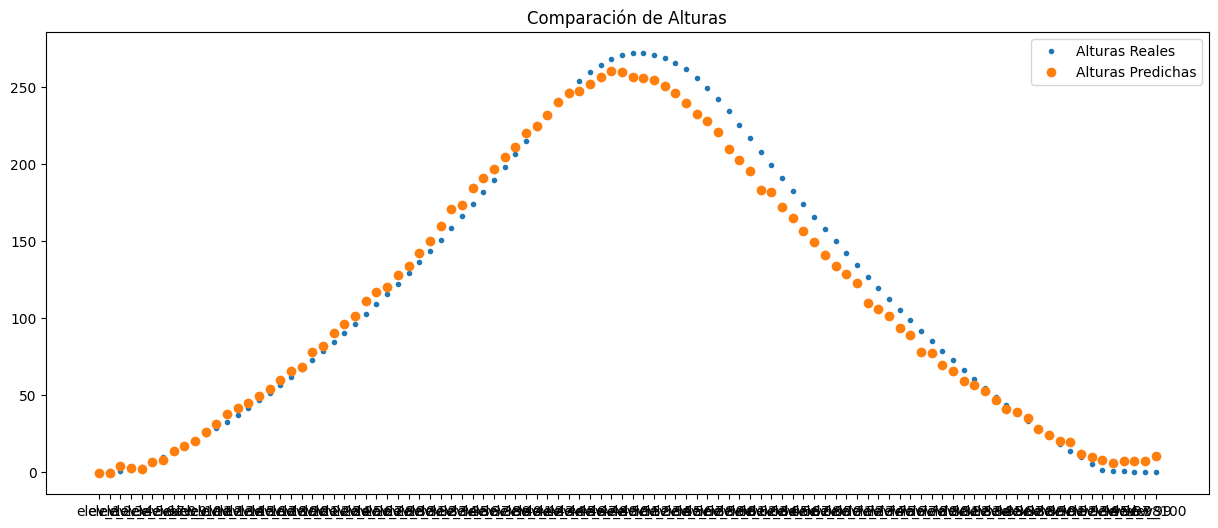

In [68]:
y_true =y_test.iloc[idx]

y_true_alturas = y_true[0:100]
y_pred_alturas = y_pred[0,0:100]

# Grafica Alturas 
plt.figure(figsize = (15,6))
plt.plot(y_true_alturas, label = 'Alturas Reales', linestyle = 'None', marker = '.')
plt.plot(y_pred_alturas, label = 'Alturas Predichas', linestyle = 'None', marker = 'o')
#plt.ylim(0,-50)
plt.title('Comparación de Alturas')
plt.legend()
plt.show()

In [63]:
from sklearn.metrics import mean_squared_error as mse

#Me parece que esta mal
mse_altura = custom_mse(y_true_alturas,y_pred_alturas)
#print("Error cuadratico Medio Alturas: ",mse_altura)

# Considero correcto se importo.
rmse1 = (mse(y_true_alturas,y_pred_alturas))**0.5
print(rmse1)

22.726668892626


In [ ]:
save_model = False

if save_model == True:
  autoencoder.save('modelos_entrenamiento/entrenamiento_alturas2.keras')